In [1]:
# Setup and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Path to the data file
# Assuming the script is run from the project's root directory
file_path = '../../data/raw/harvard-lil_cold-cases_train_first200k.csv'

In [2]:
# Load the dataset
if os.path.exists(file_path):
    df = pd.read_csv(file_path, low_memory=False)
    print('Dataset loaded successfully!')
else:
    print(f'Error: File not found at {file_path}')
    # Exit if the file doesn't exist to avoid errors in subsequent cells
    exit()

Dataset loaded successfully!


In [3]:
# Basic Information
# In a script, we use print() instead of display()
print('\nFirst 5 rows:')
print(df.head())

print('\nDataFrame Info:')
df.info()


First 5 rows:
        id                                    judges  date_filed  \
0  2636981  Chapel, Johnson, Lile, Lumpkin, Strubhar  2002-04-11   
1  1742237                                 Longstaff  1996-05-15   
2  2697755                                     Kline  2012-02-13   
3  2333112                                   Kimball  2004-10-04   
4  2427282                                      Crow  2004-04-29   

   date_filed_is_approximate  \
0                      False   
1                      False   
2                      False   
3                      False   
4                      False   

                                                slug case_name_short  \
0                                   state-v-howerton        Howerton   
1                           bruce-v-ici-americas-inc           Bruce   
2                                      bell-v-turner          Turner   
3                                   hafen-v-strebeck           Hafen   
4  sanders-ex-rel-rayl-

In [4]:
# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with more than 0 missing values, sorted
print('\nColumns with missing values:')
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))


Columns with missing values:
                 Missing Values  Percentage
correction                99978      99.978
arguments                 99422      99.422
cross_reference           99318      99.318
history                   99236      99.236
nature_of_suit            98693      98.693
syllabus                  97587      97.587
disposition               96142      96.142
posture                   92135      92.135
headnotes                 89745      89.745
summary                   86422      86.422
other_dates               80728      80.728
headmatter                68834      68.834
attorneys                 42136      42.136
judges                    35449      35.449
case_name_short           29890      29.890
case_name_full            22284      22.284
citations                 11749      11.749
case_name                  1217       1.217
opinions                    146       0.146


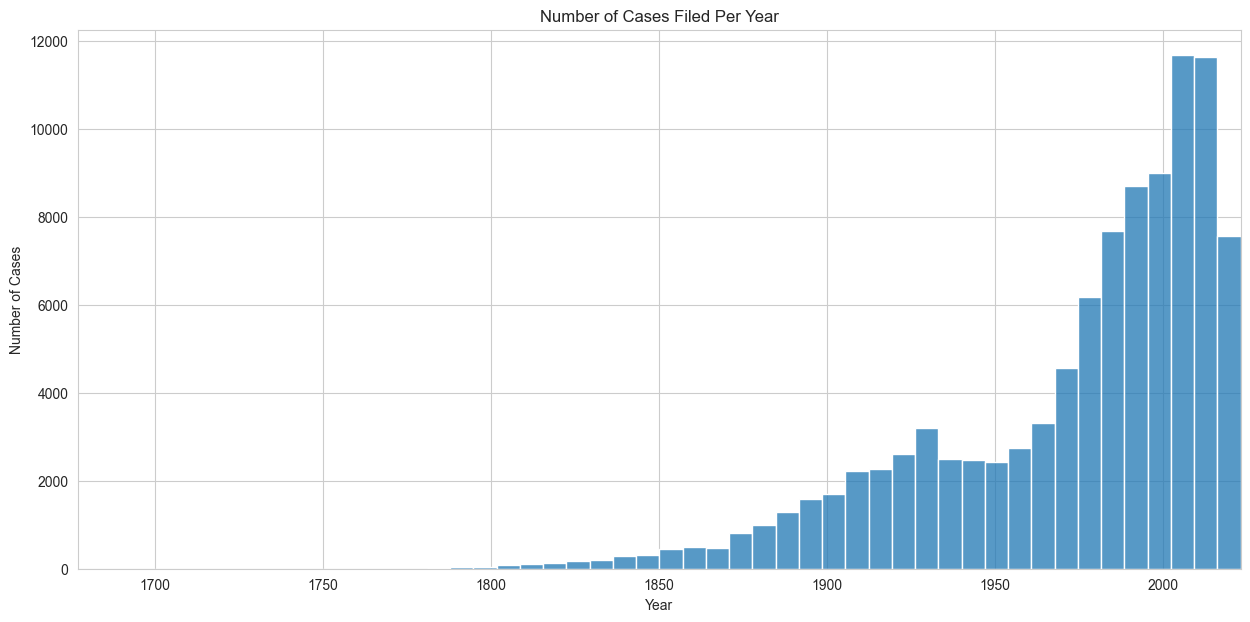

In [5]:
# Number of Cases Filed Over Time
# Convert 'date_filed' to datetime, coercing errors
df['date_filed'] = pd.to_datetime(df['date_filed'], errors='coerce')

# Extract the year
df['year_filed'] = df['date_filed'].dt.year

plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='year_filed', bins=50, kde=False)
plt.title('Number of Cases Filed Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
# Add a check to prevent error if all year values are NaN
if not df['year_filed'].isnull().all():
    plt.xlim(df['year_filed'].min(), df['year_filed'].max())
plt.show()

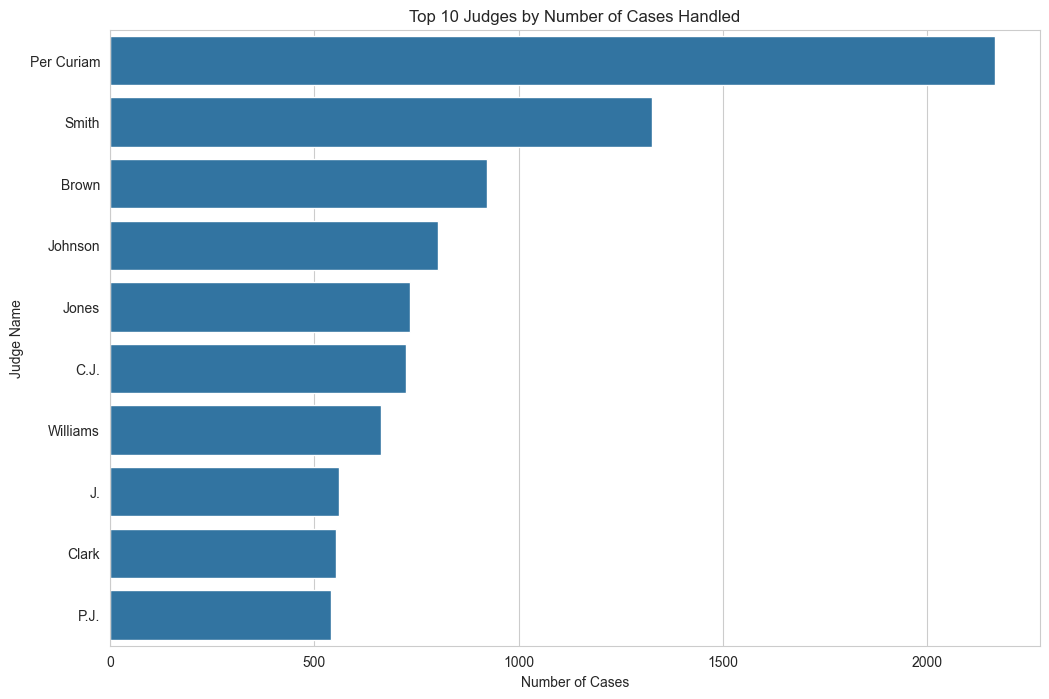

In [6]:
# Top 10 Judges by Number of Cases
# Drop rows where judges are null and split the strings
judges = df['judges'].dropna().str.split(', ')

# Flatten the list of judges
all_judges = [judge for sublist in judges for judge in sublist]

# Convert to a pandas Series for easy counting
judge_series = pd.Series(all_judges)

# Get the top 10 most frequent judges
top_10_judges = judge_series.value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_judges.index, x=top_10_judges.values, orient='h')
plt.title('Top 10 Judges by Number of Cases Handled')
plt.xlabel('Number of Cases')
plt.ylabel('Judge Name')
plt.show()